# CHAPTER 3 Processing and Understanding Text

In [1]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint


## Text Tokenization

In [2]:
## SENTENCE TOKENIZATION

# loading text corpora
alice = gutenberg.raw(fileids='carroll-alice.txt')
sample_text = 'We will discuss briefly about the basic syntax,\
 structure and design philosophies. \
 There is a defined hierarchical syntax for Python code which you should remember \
 when writing code! Python is a really powerful programming language!'
               
# Total characters in Alice in Wonderland
print len(alice)
# First 100 characters in the corpus
print alice[0:100]
print


144395
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was



In [3]:
## default sentence tokenizer
default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)

print 'Total sentences in sample_text:', len(sample_sentences)
print 'Sample text sentences :-'
pprint(sample_sentences)
print '\nTotal sentences in alice:', len(alice_sentences)
print 'First 5 sentences in alice:-'
pprint(alice_sentences[0:5])


Total sentences in sample_text: 3
Sample text sentences :-
['We will discuss briefly about the basic syntax, structure and design philosophies.',
 'There is a defined hierarchical syntax for Python code which you should remember  when writing code!',
 'Python is a really powerful programming language!']

Total sentences in alice: 1625
First 5 sentences in alice:-
[u"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.",
 u"Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'",
 u'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking th

In [4]:
## Other languages sentence tokenization
from nltk.corpus import europarl_raw

german_text = europarl_raw.german.raw(fileids='ep-00-01-17.de')
# Total characters in the corpus
print len(german_text)
# First 100 characters in the corpus
print german_text[0:100]
print

# default sentence tokenizer 
german_sentences_def = default_st(text=german_text, language='german')

# loading german text tokenizer into a PunktSentenceTokenizer instance  
german_tokenizer = nltk.data.load(resource_url='tokenizers/punkt/german.pickle')
german_sentences = german_tokenizer.tokenize(german_text)

# verify the type of german_tokenizer
# should be PunktSentenceTokenizer
print type(german_tokenizer)

# check if results of both tokenizers match
# should be True
print german_sentences_def == german_sentences
# print first 5 sentences of the corpus
for sent in german_sentences[0:5]:
    print sent


157171
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sit

<class 'nltk.tokenize.punkt.PunktSentenceTokenizer'>
True
 
Wiederaufnahme der Sitzungsperiode Ich erkläre die am Freitag , dem 17. Dezember unterbrochene Sitzungsperiode des Europäischen Parlaments für wiederaufgenommen , wünsche Ihnen nochmals alles Gute zum Jahreswechsel und hoffe , daß Sie schöne Ferien hatten .
Wie Sie feststellen konnten , ist der gefürchtete " Millenium-Bug " nicht eingetreten .
Doch sind Bürger einiger unserer Mitgliedstaaten Opfer von schrecklichen Naturkatastrophen geworden .
Im Parlament besteht der Wunsch nach einer Aussprache im Verlauf dieser Sitzungsperiode in den nächsten Tagen .
Heute möchte ich Sie bitten - das ist auch der Wunsch einiger Kolleginnen und Kollegen - , allen Opfern der Stürme , insbesondere in den verschiedenen Ländern der Europäischen Union , in einer Schweigeminute zu gedenken .


In [5]:
## using PunktSentenceTokenizer for sentence tokenization
punkt_st = nltk.tokenize.PunktSentenceTokenizer()
sample_sentences = punkt_st.tokenize(sample_text)
pprint(sample_sentences)


['We will discuss briefly about the basic syntax, structure and design philosophies.',
 'There is a defined hierarchical syntax for Python code which you should remember  when writing code!',
 'Python is a really powerful programming language!']


In [6]:
## using RegexpTokenizer for sentence tokenization
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s'
regex_st = nltk.tokenize.RegexpTokenizer(
            pattern=SENTENCE_TOKENS_PATTERN,
            gaps=True)
sample_sentences = regex_st.tokenize(sample_text)
pprint(sample_sentences)         


['We will discuss briefly about the basic syntax, structure and design philosophies.',
 ' There is a defined hierarchical syntax for Python code which you should remember  when writing code!',
 'Python is a really powerful programming language!']


In [7]:
## WORD TOKENIZATION

sentence = "The brown fox wasn't that quick and he couldn't win the race"


In [8]:
# default word tokenizer
default_wt = nltk.word_tokenize
words = default_wt(sentence)
print words       


['The', 'brown', 'fox', 'was', "n't", 'that', 'quick', 'and', 'he', 'could', "n't", 'win', 'the', 'race']


In [9]:
# treebank word tokenizer
treebank_wt = nltk.TreebankWordTokenizer()
words = treebank_wt.tokenize(sentence)
print words


['The', 'brown', 'fox', 'was', "n't", 'that', 'quick', 'and', 'he', 'could', "n't", 'win', 'the', 'race']


In [10]:
# regex word tokenizer
TOKEN_PATTERN = r'\w+'        
regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=False)
words = regex_wt.tokenize(sentence)
print words


['The', 'brown', 'fox', 'wasn', 't', 'that', 'quick', 'and', 'he', 'couldn', 't', 'win', 'the', 'race']


In [11]:
GAP_PATTERN = r'\s+'        
regex_wt = nltk.RegexpTokenizer(pattern=GAP_PATTERN, gaps=True)
words = regex_wt.tokenize(sentence)
print words


['The', 'brown', 'fox', "wasn't", 'that', 'quick', 'and', 'he', "couldn't", 'win', 'the', 'race']


In [12]:
word_indices = list(regex_wt.span_tokenize(sentence))
print word_indices
print [sentence[start:end] for start, end in word_indices]


[(0, 3), (4, 9), (10, 13), (14, 20), (21, 25), (26, 31), (32, 35), (36, 38), (39, 47), (48, 51), (52, 55), (56, 60)]
['The', 'brown', 'fox', "wasn't", 'that', 'quick', 'and', 'he', "couldn't", 'win', 'the', 'race']


In [13]:
# derived regex tokenizers
wordpunkt_wt = nltk.WordPunctTokenizer()
words = wordpunkt_wt.tokenize(sentence)
print words

whitespace_wt = nltk.WhitespaceTokenizer()
words = whitespace_wt.tokenize(sentence)
print words

['The', 'brown', 'fox', 'wasn', "'", 't', 'that', 'quick', 'and', 'he', 'couldn', "'", 't', 'win', 'the', 'race']
['The', 'brown', 'fox', "wasn't", 'that', 'quick', 'and', 'he', "couldn't", 'win', 'the', 'race']


## Text Normalization

In [14]:
import nltk
import re
import string
from pprint import pprint


In [15]:
corpus = ["The brown fox wasn't that quick and he couldn't win the race",
          "Hey that's a great deal! I just bought a phone for $199",
          "@@You'll (learn) a **lot** in the book. Python is an amazing language!@@"]


def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences] 
    return word_tokens
    
token_list = [tokenize_text(text)  for text in corpus]
pprint(token_list)
print


[[['The',
   'brown',
   'fox',
   'was',
   "n't",
   'that',
   'quick',
   'and',
   'he',
   'could',
   "n't",
   'win',
   'the',
   'race']],
 [['Hey', 'that', "'s", 'a', 'great', 'deal', '!'],
  ['I', 'just', 'bought', 'a', 'phone', 'for', '$', '199']],
 [['@',
   '@',
   'You',
   "'ll",
   '(',
   'learn',
   ')',
   'a',
   '**lot**',
   'in',
   'the',
   'book',
   '.'],
  ['Python', 'is', 'an', 'amazing', 'language', '!'],
  ['@', '@']]]



In [16]:
def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    return filtered_tokens
    
filtered_list_1 =  [filter(None,[remove_characters_after_tokenization(tokens) 
                                for tokens in sentence_tokens]) 
                    for sentence_tokens in token_list]
print filtered_list_1
print  


[[['The', 'brown', 'fox', 'was', 'nt', 'that', 'quick', 'and', 'he', 'could', 'nt', 'win', 'the', 'race']], [['Hey', 'that', 's', 'a', 'great', 'deal'], ['I', 'just', 'bought', 'a', 'phone', 'for', '199']], [['You', 'll', 'learn', 'a', 'lot', 'in', 'the', 'book'], ['Python', 'is', 'an', 'amazing', 'language']]]



In [17]:
def remove_characters_before_tokenization(sentence, keep_apostrophes=False):
    sentence = sentence.strip()
    if keep_apostrophes:
        PATTERN = r'[?|$|&|*|%|@|(|)|~]'
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    else:
        PATTERN = r'[^a-zA-Z0-9 ]'
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    return filtered_sentence
    
filtered_list_2 = [remove_characters_before_tokenization(sentence) 
                    for sentence in corpus]    
print filtered_list_2
print 


['The brown fox wasnt that quick and he couldnt win the race', 'Hey thats a great deal I just bought a phone for 199', 'Youll learn a lot in the book Python is an amazing language']



In [18]:
cleaned_corpus = [remove_characters_before_tokenization(sentence, keep_apostrophes=True) 
                  for sentence in corpus]
print cleaned_corpus


["The brown fox wasn't that quick and he couldn't win the race", "Hey that's a great deal! I just bought a phone for 199", "You'll learn a lot in the book. Python is an amazing language!"]


In [19]:
from contractions import CONTRACTION_MAP

def expand_contractions(sentence, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence
    
expanded_corpus = [expand_contractions(sentence, CONTRACTION_MAP) 
                    for sentence in cleaned_corpus]    
print expanded_corpus
print 


['The brown fox was not that quick and he could not win the race', 'Hey that is a great deal! I just bought a phone for 199', 'You will learn a lot in the book. Python is an amazing language!']



In [20]:
# case conversion    
print corpus[0].lower()
print corpus[0].upper()


the brown fox wasn't that quick and he couldn't win the race
THE BROWN FOX WASN'T THAT QUICK AND HE COULDN'T WIN THE RACE


In [21]:
# removing stopwords
def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens
    
expanded_corpus_tokens = [tokenize_text(text)
                          for text in expanded_corpus]    
filtered_list_3 =  [[remove_stopwords(tokens) 
                        for tokens in sentence_tokens] 
                        for sentence_tokens in expanded_corpus_tokens]
print filtered_list_3
print 


[[['The', 'brown', 'fox', 'quick', 'could', 'win', 'race']], [['Hey', 'great', 'deal', '!'], ['I', 'bought', 'phone', '199']], [['You', 'learn', 'lot', 'book', '.'], ['Python', 'amazing', 'language', '!']]]



In [22]:
# removing repeated characters
sample_sentence = 'My schooool is realllllyyy amaaazingggg'
sample_sentence_tokens = tokenize_text(sample_sentence)[0]

from nltk.corpus import wordnet

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

print remove_repeated_characters(sample_sentence_tokens)    


['My', 'school', 'is', 'really', 'amazing']


In [23]:
# porter stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

print ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

print ps.stem('lying')

print ps.stem('strange')


jump jump jump
lie
strang


In [24]:
# lancaster stemmer
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()

print ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped')

print ls.stem('lying')

print ls.stem('strange')


jump jump jump
lying
strange


In [25]:
# regex stemmer
from nltk.stem import RegexpStemmer
rs = RegexpStemmer('ing$|s$|ed$', min=4)

print rs.stem('jumping'), rs.stem('jumps'), rs.stem('jumped')

print rs.stem('lying')

print rs.stem('strange')


jump jump jump
ly
strange


In [26]:
# snowball stemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("german")
print 'Supported Languages:', SnowballStemmer.languages


Supported Languages: (u'danish', u'dutch', u'english', u'finnish', u'french', u'german', u'hungarian', u'italian', u'norwegian', u'porter', u'portuguese', u'romanian', u'russian', u'spanish', u'swedish')


In [27]:
# autobahnen -> cars
# autobahn -> car
ss.stem('autobahnen')


u'autobahn'

In [28]:
# springen -> jumping
# spring -> jump
ss.stem('springen')


u'spring'

In [29]:
# lemmatization
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()


In [30]:
# lemmatize nouns
print wnl.lemmatize('cars', 'n')
print wnl.lemmatize('men', 'n')

# lemmatize verbs
print wnl.lemmatize('running', 'v')
print wnl.lemmatize('ate', 'v')

# lemmatize adjectives
print wnl.lemmatize('saddest', 'a')
print wnl.lemmatize('fancier', 'a')

# ineffective lemmatization
print wnl.lemmatize('ate', 'n')
print wnl.lemmatize('fancier', 'v')

car
men
run
eat
sad
fancy
ate
fancier


## Correcting Spellings

In [31]:
import re, collections

def tokens(text): 
    """
    Get all words from the corpus
    """
    return re.findall('[a-z]+', text.lower()) 

WORDS = tokens(file('big.txt').read())
WORD_COUNTS = collections.Counter(WORDS)

# top 10 words in corpus
print WORD_COUNTS.most_common(10)


[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [32]:
def known(words):
    """
    Return the subset of words that are actually 
    in our WORD_COUNTS dictionary.
    """
    return {w for w in words if w in WORD_COUNTS}


def edits0(word): 
    """
    Return all strings that are zero edits away 
    from the input word (i.e., the word itself).
    """
    return {word}



def edits1(word):
    """
    Return all strings that are one edit away 
    from the input word.
    """
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    def splits(word):
        """
        Return a list of all possible (first, rest) pairs 
        that the input word is made of.
        """
        return [(word[:i], word[i:]) 
                for i in range(len(word)+1)]
                
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)


def edits2(word):
    """Return all strings that are two edits away 
    from the input word.
    """
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}
    
    
def correct(word):
    """
    Get the best correct spelling for the input word
    """
    # Priority is for edit distance 0, then 1, then 2
    # else defaults to the input word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=WORD_COUNTS.get)


def correct_match(match):
    """
    Spell-correct word in match, 
    and preserve proper upper/lower/title case.
    """
    
    word = match.group()
    def case_of(text):
        """
        Return the case-function appropriate 
        for text: upper, lower, title, or just str.:
            """
        return (str.upper if text.isupper() else
                str.lower if text.islower() else
                str.title if text.istitle() else
                str)
    return case_of(word)(correct(word.lower()))

    
def correct_text_generic(text):
    """
    Correct all the words within a text, 
    returning the corrected text.
    """
    return re.sub('[a-zA-Z]+', correct_match, text)


In [33]:
print correct_text_generic('fianlly')


finally


In [34]:
#pip install pattern

from pattern.en import suggest

print suggest('fianlly')
print suggest('flaot')
    


[('finally', 1.0)]
[('flat', 0.85), ('float', 0.15)]


## Understanding Text Syntax and Structure

pip install pydot-ng

pip install graphviz

### Parts of Speech (POS) Tagging

In [35]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'


# recommended tagger based on PTB
import nltk
tokens = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokens, tagset='universal')
print tagged_sent


[('The', u'DET'), ('brown', u'ADJ'), ('fox', u'NOUN'), ('is', u'VERB'), ('quick', u'ADJ'), ('and', u'CONJ'), ('he', u'PRON'), ('is', u'VERB'), ('jumping', u'VERB'), ('over', u'ADP'), ('the', u'DET'), ('lazy', u'ADJ'), ('dog', u'NOUN')]


In [36]:
from pattern.en import tag
tagged_sent = tag(sentence)
print tagged_sent



[(u'The', u'DT'), (u'brown', u'JJ'), (u'fox', u'NN'), (u'is', u'VBZ'), (u'quick', u'JJ'), (u'and', u'CC'), (u'he', u'PRP'), (u'is', u'VBZ'), (u'jumping', u'VBG'), (u'over', u'IN'), (u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')]


In [37]:
# building your own tagger

# preparing the data
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print train_data[0]


[(u'Pierre', u'NNP'), (u'Vinken', u'NNP'), (u',', u','), (u'61', u'CD'), (u'years', u'NNS'), (u'old', u'JJ'), (u',', u','), (u'will', u'MD'), (u'join', u'VB'), (u'the', u'DT'), (u'board', u'NN'), (u'as', u'IN'), (u'a', u'DT'), (u'nonexecutive', u'JJ'), (u'director', u'NN'), (u'Nov.', u'NNP'), (u'29', u'CD'), (u'.', u'.')]


In [38]:
# default tagger
from nltk.tag import DefaultTagger
dt = DefaultTagger('NN')

print dt.evaluate(test_data)


0.145415819537


In [39]:
print dt.tag(tokens)


[('The', 'NN'), ('brown', 'NN'), ('fox', 'NN'), ('is', 'NN'), ('quick', 'NN'), ('and', 'NN'), ('he', 'NN'), ('is', 'NN'), ('jumping', 'NN'), ('over', 'NN'), ('the', 'NN'), ('lazy', 'NN'), ('dog', 'NN')]


In [40]:
# regex tagger
from nltk.tag import RegexpTagger
# define regex tag patterns
patterns = [
        (r'.*ing$', 'VBG'),               # gerunds
        (r'.*ed$', 'VBD'),                # simple past
        (r'.*es$', 'VBZ'),                # 3rd singular present
        (r'.*ould$', 'MD'),               # modals
        (r'.*\'s$', 'NN$'),               # possessive nouns
        (r'.*s$', 'NNS'),                 # plural nouns
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                     # nouns (default) ... 
]
rt = RegexpTagger(patterns)

print rt.evaluate(test_data)
print rt.tag(tokens)



0.240391131765
[('The', 'NN'), ('brown', 'NN'), ('fox', 'NN'), ('is', 'NNS'), ('quick', 'NN'), ('and', 'NN'), ('he', 'NN'), ('is', 'NNS'), ('jumping', 'VBG'), ('over', 'NN'), ('the', 'NN'), ('lazy', 'NN'), ('dog', 'NN')]


In [41]:
## N gram taggers
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)

print ut.evaluate(test_data)
print ut.tag(tokens)

print bt.evaluate(test_data)
print bt.tag(tokens)

print tt.evaluate(test_data)
print tt.tag(tokens)



0.861361215994
[('The', u'DT'), ('brown', None), ('fox', None), ('is', u'VBZ'), ('quick', u'JJ'), ('and', u'CC'), ('he', u'PRP'), ('is', u'VBZ'), ('jumping', u'VBG'), ('over', u'IN'), ('the', u'DT'), ('lazy', None), ('dog', None)]
0.134669377481
[('The', u'DT'), ('brown', None), ('fox', None), ('is', None), ('quick', None), ('and', None), ('he', None), ('is', None), ('jumping', None), ('over', None), ('the', None), ('lazy', None), ('dog', None)]
0.0806467228192
[('The', u'DT'), ('brown', None), ('fox', None), ('is', None), ('quick', None), ('and', None), ('he', None), ('is', None), ('jumping', None), ('over', None), ('the', None), ('lazy', None), ('dog', None)]


In [42]:
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

ct = combined_tagger(train_data=train_data, 
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)

print ct.evaluate(test_data)        
print ct.tag(tokens)


0.910155871817
[('The', u'DT'), ('brown', 'NN'), ('fox', 'NN'), ('is', u'VBZ'), ('quick', u'JJ'), ('and', u'CC'), ('he', u'PRP'), ('is', u'VBZ'), ('jumping', 'VBG'), ('over', u'IN'), ('the', u'DT'), ('lazy', 'NN'), ('dog', 'NN')]


In [43]:
from nltk.classify import NaiveBayesClassifier, MaxentClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=NaiveBayesClassifier.train)

print nbt.evaluate(test_data)
print nbt.tag(tokens)    


0.930680607997
[('The', u'DT'), ('brown', u'JJ'), ('fox', u'NN'), ('is', u'VBZ'), ('quick', u'JJ'), ('and', u'CC'), ('he', u'PRP'), ('is', u'VBZ'), ('jumping', u'VBG'), ('over', u'IN'), ('the', u'DT'), ('lazy', u'JJ'), ('dog', u'VBG')]


In [44]:
# try this out for fun!
met = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=MaxentClassifier.train)
print met.evaluate(test_data)                           
print met.tag(tokens)

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -3.82864        0.007
             2          -0.76176        0.957


/pub/anaconda3/envs/python2/lib/python2.7/site-packages/nltk/classify/maxent.py:1310: RuntimeWarning: overflow encountered in power
  exp_nf_delta = 2 ** nf_delta
/pub/anaconda3/envs/python2/lib/python2.7/site-packages/nltk/classify/maxent.py:1312: RuntimeWarning: invalid value encountered in multiply
  sum1 = numpy.sum(exp_nf_delta * A, axis=0)
/pub/anaconda3/envs/python2/lib/python2.7/site-packages/nltk/classify/maxent.py:1313: RuntimeWarning: invalid value encountered in multiply
  sum2 = numpy.sum(nf_exp_nf_delta * A, axis=0)


         Final               nan        0.984
0.927001645851
[('The', u'DT'), ('brown', u'NN'), ('fox', u'NN'), ('is', u'VBZ'), ('quick', u'JJ'), ('and', u'CC'), ('he', u'PRP'), ('is', u'VBZ'), ('jumping', u'VBG'), ('over', u'IN'), ('the', u'DT'), ('lazy', u'NN'), ('dog', u'NN')]


### Shallow Parsing

In [45]:
from pattern.en import parsetree, Chunk
from nltk.tree import Tree

sentence = 'The brown fox is quick and he is jumping over the lazy dog'


In [46]:
tree = parsetree(sentence)
print tree


[Sentence('The/DT/B-NP/O brown/JJ/I-NP/O fox/NN/I-NP/O is/VBZ/B-VP/O quick/JJ/B-ADJP/O and/CC/O/O he/PRP/B-NP/O is/VBZ/B-VP/O jumping/VBG/I-VP/O over/IN/B-PP/B-PNP the/DT/B-NP/I-PNP lazy/JJ/I-NP/I-PNP dog/NN/I-NP/I-PNP')]


In [47]:
for sentence_tree in tree:
    print sentence_tree.chunks


[Chunk('The brown fox/NP'), Chunk('is/VP'), Chunk('quick/ADJP'), Chunk('he/NP'), Chunk('is jumping/VP'), Chunk('over/PP'), Chunk('the lazy dog/NP')]


In [48]:
for sentence_tree in tree:
    for chunk in sentence_tree.chunks:
        print chunk.type, '->', [(word.string, word.type) 
                                 for word in chunk.words]


NP -> [(u'The', u'DT'), (u'brown', u'JJ'), (u'fox', u'NN')]
VP -> [(u'is', u'VBZ')]
ADJP -> [(u'quick', u'JJ')]
NP -> [(u'he', u'PRP')]
VP -> [(u'is', u'VBZ'), (u'jumping', u'VBG')]
PP -> [(u'over', u'IN')]
NP -> [(u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')]


In [49]:
def create_sentence_tree(sentence, lemmatize=False):
    sentence_tree = parsetree(sentence, 
                              relations=True, 
                              lemmata=lemmatize)
    return sentence_tree[0]

def get_sentence_tree_constituents(sentence_tree):
    return sentence_tree.constituents()
    
def process_sentence_tree(sentence_tree):
    
    tree_constituents = get_sentence_tree_constituents(sentence_tree)
    processed_tree = [
                        (item.type,
                         [
                             (w.string, w.type)
                             for w in item.words
                         ]
                        )
                        if type(item) == Chunk
                        else ('-',
                              [
                                   (item.string, item.type)
                              ]
                             )
                             for item in tree_constituents
                    ]
    
    return processed_tree
    
def print_sentence_tree(sentence_tree):
    

    processed_tree = process_sentence_tree(sentence_tree)
    processed_tree = [
                        Tree( item[0],
                             [
                                 Tree(x[1], [x[0]])
                                 for x in item[1]
                             ]
                            )
                            for item in processed_tree
                     ]

    tree = Tree('S', processed_tree )
    print tree
    
def visualize_sentence_tree(sentence_tree):
    
    processed_tree = process_sentence_tree(sentence_tree)
    processed_tree = [
                        Tree( item[0],
                             [
                                 Tree(x[1], [x[0]])
                                 for x in item[1]
                             ]
                            )
                            for item in processed_tree
                     ]
    tree = Tree('S', processed_tree )
    tree.draw()


In [50]:
t = create_sentence_tree(sentence)
print t


Sentence('The/DT/B-NP/O/NP-SBJ-1 brown/JJ/I-NP/O/NP-SBJ-1 fox/NN/I-NP/O/NP-SBJ-1 is/VBZ/B-VP/O/VP-1 quick/JJ/B-ADJP/O/O and/CC/O/O/O he/PRP/B-NP/O/NP-SBJ-2 is/VBZ/B-VP/O/VP-2 jumping/VBG/I-VP/O/VP-2 over/IN/B-PP/B-PNP/O the/DT/B-NP/I-PNP/O lazy/JJ/I-NP/I-PNP/O dog/NN/I-NP/I-PNP/O')


In [51]:
pt = process_sentence_tree(t)
pt


[(u'NP', [(u'The', u'DT'), (u'brown', u'JJ'), (u'fox', u'NN')]),
 (u'VP', [(u'is', u'VBZ')]),
 (u'ADJP', [(u'quick', u'JJ')]),
 ('-', [(u'and', u'CC')]),
 (u'NP', [(u'he', u'PRP')]),
 (u'VP', [(u'is', u'VBZ'), (u'jumping', u'VBG')]),
 (u'PP', [(u'over', u'IN')]),
 (u'NP', [(u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')])]

In [52]:
print_sentence_tree(t)
visualize_sentence_tree(t)


(S
  (NP (DT The) (JJ brown) (NN fox))
  (VP (VBZ is))
  (ADJP (JJ quick))
  (- (CC and))
  (NP (PRP he))
  (VP (VBZ is) (VBG jumping))
  (PP (IN over))
  (NP (DT the) (JJ lazy) (NN dog)))


In [53]:
from nltk.corpus import treebank_chunk
data = treebank_chunk.chunked_sents()
train_data = data[:4000]
test_data = data[4000:]
print train_data[7]


(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [54]:
simple_sentence = 'the quick fox jumped over the lazy dog'

from nltk.chunk import RegexpParser
from pattern.en import tag

tagged_simple_sent = tag(simple_sentence)
print tagged_simple_sent


[(u'the', u'DT'), (u'quick', u'JJ'), (u'fox', u'NN'), (u'jumped', u'VBD'), (u'over', u'IN'), (u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')]


In [55]:
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""
rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)
print c


(S
  (NP the/DT quick/JJ fox/NN)
  jumped/VBD
  over/IN
  (NP the/DT lazy/JJ dog/NN))


In [56]:
chink_grammar = """
NP: {<.*>+} # chunk everything as NP
}<VBD|IN>+{
"""
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)
print c


(S
  (NP the/DT quick/JJ fox/NN)
  jumped/VBD
  over/IN
  (NP the/DT lazy/JJ dog/NN))


In [57]:
tagged_sentence = tag(sentence)
print tagged_sentence


[(u'The', u'DT'), (u'brown', u'JJ'), (u'fox', u'NN'), (u'is', u'VBZ'), (u'quick', u'JJ'), (u'and', u'CC'), (u'he', u'PRP'), (u'is', u'VBZ'), (u'jumping', u'VBG'), (u'over', u'IN'), (u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')]


In [58]:
grammar = """
NP: {<DT>?<JJ>?<NN.*>}  
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}      
VP: {<MD>?<VB.*>+}

"""
rc = RegexpParser(grammar)
c = rc.parse(tagged_sentence)

print c
print rc.evaluate(test_data)


(S
  (NP The/DT brown/JJ fox/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  he/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT lazy/JJ dog/NN))
ChunkParse score:
    IOB Accuracy:  54.5%
    Precision:     25.0%
    Recall:        52.5%
    F-Measure:     33.9%


In [59]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

train_sent = train_data[7]
print train_sent


(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [60]:
wtc = tree2conlltags(train_sent)
wtc


[(u'A', u'DT', u'B-NP'),
 (u'Lorillard', u'NNP', u'I-NP'),
 (u'spokewoman', u'NN', u'I-NP'),
 (u'said', u'VBD', u'O'),
 (u',', u',', u'O'),
 (u'``', u'``', u'O'),
 (u'This', u'DT', u'B-NP'),
 (u'is', u'VBZ', u'O'),
 (u'an', u'DT', u'B-NP'),
 (u'old', u'JJ', u'I-NP'),
 (u'story', u'NN', u'I-NP'),
 (u'.', u'.', u'O')]

In [61]:
tree = conlltags2tree(wtc)
print tree


(S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [62]:
def conll_tag_chunks(chunk_sents):
  tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
  return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]
  
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff


In [63]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)


In [64]:
ntc = NGramTagChunker(train_data)
print ntc.evaluate(test_data)


ChunkParse score:
    IOB Accuracy:  99.6%
    Precision:     98.4%
    Recall:       100.0%
    F-Measure:     99.2%


In [65]:
tree = ntc.parse(tagged_sentence)
print tree
tree.draw()


(S
  (NP The/DT brown/JJ fox/NN)
  is/VBZ
  (NP quick/JJ)
  and/CC
  (NP he/PRP)
  is/VBZ
  jumping/VBG
  over/IN
  (NP the/DT lazy/JJ dog/NN))


In [66]:
from nltk.corpus import conll2000
wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:7500]
test_wsj_data = wsj_data[7500:]
print train_wsj_data[10]


(S
  (NP He/PRP)
  (VP reckons/VBZ)
  (NP the/DT current/JJ account/NN deficit/NN)
  (VP will/MD narrow/VB)
  (PP to/TO)
  (NP only/RB #/# 1.8/CD billion/CD)
  (PP in/IN)
  (NP September/NNP)
  ./.)


In [67]:
tc = NGramTagChunker(train_wsj_data)
print tc.evaluate(test_wsj_data)

ChunkParse score:
    IOB Accuracy:  89.4%
    Precision:     80.8%
    Recall:        85.9%
    F-Measure:     83.3%


### Dependency-based Parsing

conda install libgcc

pip install spacy

In [68]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

from spacy.en import English
parser = English()
parsed_sent = parser(unicode(sentence))

dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in parsed_sent:
    print dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights])


[]<---The[]--->[]
--------
[]<---brown[]--->[]
--------
[]<---fox[]--->[]
--------
[]<---is[]--->[]
--------
[]<---quick[]--->[]
--------
[]<---and[]--->[]
--------
[]<---he[]--->[]
--------
[]<---is[]--->[]
--------
[]<---jumping[]--->[]
--------
[]<---over[]--->[]
--------
[]<---the[]--->[]
--------
[]<---lazy[]--->[]
--------
[]<---dog[]--->[]
--------


It looks like wrong result!!

Downloads stanford-parser-full-2016-10-31.zip from
https://nlp.stanford.edu/software/lex-parser.shtml#Download

In [70]:
# set java path
import os
java_path = r'/usr/bin/java'
os.environ['JAVAHOME'] = java_path
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='/pub/nltk-parser/stanford-parser/stanford-parser.jar',
                               path_to_models_jar='/pub/nltk-parser/stanford-parser/stanford-parser-3.7.0-models.jar')    


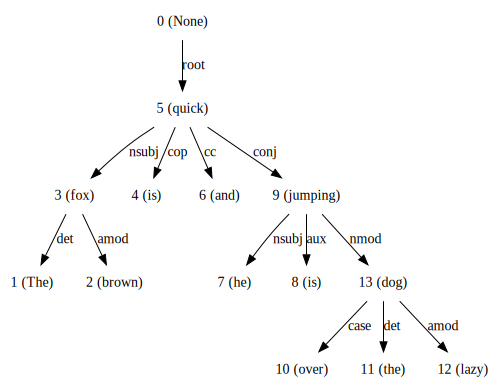

In [71]:
result = list(sdp.raw_parse(sentence))  

result[0]


In [72]:
[item for item in result[0].triples()]


[((u'quick', u'JJ'), u'nsubj', (u'fox', u'NN')),
 ((u'fox', u'NN'), u'det', (u'The', u'DT')),
 ((u'fox', u'NN'), u'amod', (u'brown', u'JJ')),
 ((u'quick', u'JJ'), u'cop', (u'is', u'VBZ')),
 ((u'quick', u'JJ'), u'cc', (u'and', u'CC')),
 ((u'quick', u'JJ'), u'conj', (u'jumping', u'VBG')),
 ((u'jumping', u'VBG'), u'nsubj', (u'he', u'PRP')),
 ((u'jumping', u'VBG'), u'aux', (u'is', u'VBZ')),
 ((u'jumping', u'VBG'), u'nmod', (u'dog', u'NN')),
 ((u'dog', u'NN'), u'case', (u'over', u'IN')),
 ((u'dog', u'NN'), u'det', (u'the', u'DT')),
 ((u'dog', u'NN'), u'amod', (u'lazy', u'JJ'))]

In [73]:
dep_tree = [parse.tree() for parse in result][0]
print dep_tree
dep_tree.draw()


(quick (fox The brown) is and (jumping he is (dog over the lazy)))


In [74]:
import nltk
tokens = nltk.word_tokenize(sentence)

dependency_rules = """
'fox' -> 'The' | 'brown'
'quick' -> 'fox' | 'is' | 'and' | 'jumping'
'jumping' -> 'he' | 'is' | 'dog'
'dog' -> 'over' | 'the' | 'lazy'
"""

dependency_grammar = nltk.grammar.DependencyGrammar.fromstring(dependency_rules)
print dependency_grammar


Dependency grammar with 12 productions
  'fox' -> 'The'
  'fox' -> 'brown'
  'quick' -> 'fox'
  'quick' -> 'is'
  'quick' -> 'and'
  'quick' -> 'jumping'
  'jumping' -> 'he'
  'jumping' -> 'is'
  'jumping' -> 'dog'
  'dog' -> 'over'
  'dog' -> 'the'
  'dog' -> 'lazy'


In [75]:
dependency_grammar = nltk.grammar.DependencyGrammar.fromstring(dependency_rules)
print dependency_grammar

dp = nltk.ProjectiveDependencyParser(dependency_grammar)
res = [item for item in dp.parse(tokens)]
tree = res[0] 
print tree

tree.draw()                          

Dependency grammar with 12 productions
  'fox' -> 'The'
  'fox' -> 'brown'
  'quick' -> 'fox'
  'quick' -> 'is'
  'quick' -> 'and'
  'quick' -> 'jumping'
  'jumping' -> 'he'
  'jumping' -> 'is'
  'jumping' -> 'dog'
  'dog' -> 'over'
  'dog' -> 'the'
  'dog' -> 'lazy'
(quick (fox The brown) is and (jumping he is (dog over the lazy)))


### Constituency-based Parsing

In [76]:
sentence = 'The brown fox is quick and he is jumping over the lazy dog'

from nltk.parse.stanford import StanfordParser
scp = StanfordParser(path_to_jar='/pub/nltk-parser/stanford-parser/stanford-parser.jar',
                    path_to_models_jar='/pub/nltk-parser/stanford-parser/stanford-parser-3.7.0-models.jar')    


In [77]:
result = list(scp.raw_parse(sentence))
print result[0]

result[0].draw()


(ROOT
  (NP
    (S
      (S
        (NP (DT The) (JJ brown) (NN fox))
        (VP (VBZ is) (ADJP (JJ quick))))
      (CC and)
      (S
        (NP (PRP he))
        (VP
          (VBZ is)
          (VP
            (VBG jumping)
            (PP (IN over) (NP (DT the) (JJ lazy) (NN dog)))))))))


In [78]:
import nltk
from nltk.grammar import Nonterminal
from nltk.corpus import treebank

training_set = treebank.parsed_sents()

print training_set[1]


(S
  (NP-SBJ (NNP Mr.) (NNP Vinken))
  (VP
    (VBZ is)
    (NP-PRD
      (NP (NN chairman))
      (PP
        (IN of)
        (NP
          (NP (NNP Elsevier) (NNP N.V.))
          (, ,)
          (NP (DT the) (NNP Dutch) (VBG publishing) (NN group))))))
  (. .))


In [79]:
# extract the productions for all annotated training sentences
treebank_productions = list(
                        set(production 
                            for sent in training_set  
                            for production in sent.productions()
                        )
                    )

treebank_productions[0:10]


[VBZ -> 'cites',
 VBD -> 'spurned',
 PRN -> , ADVP-TMP ,,
 NNP -> 'ACCOUNT',
 JJ -> '36-day',
 NP-SBJ-2 -> NN,
 JJ -> 'unpublished',
 NP-SBJ-1 -> NNP,
 JJ -> 'elusive',
 NNS -> 'Lids']

In [80]:
# add productions for each word, POS tag
for word, tag in treebank.tagged_words():
    t = nltk.Tree.fromstring("("+ tag + " " + word  +")")
    for production in t.productions():
        treebank_productions.append(production)


In [81]:
# build the PCFG based grammar  
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), 
                                         treebank_productions)

# build the parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

# get sample sentence tokens
tokens = nltk.word_tokenize(sentence)

# get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens))
print result[0]

ValueError: Grammar does not cover some of the input words: u"'brown', 'fox', 'lazy', 'dog'".

In [85]:
# get tokens and their POS tags
from pattern.en import tag as pos_tagger
tagged_sent = pos_tagger(sentence)

print tagged_sent


[(u'The', u'DT'), (u'brown', u'JJ'), (u'fox', u'NN'), (u'is', u'VBZ'), (u'quick', u'JJ'), (u'and', u'CC'), (u'he', u'PRP'), (u'is', u'VBZ'), (u'jumping', u'VBG'), (u'over', u'IN'), (u'the', u'DT'), (u'lazy', u'JJ'), (u'dog', u'NN')]


In [86]:
# extend productions for sample sentence tokens
for word, tag in tagged_sent:
    t = nltk.Tree.fromstring("("+ tag + " " + word  +")")
    for production in t.productions():
        treebank_productions.append(production)

# rebuild grammar
treebank_grammar = nltk.grammar.induce_pcfg(Nonterminal('S'), 
                                         treebank_productions)                                         

# rebuild parser
viterbi_parser = nltk.ViterbiParser(treebank_grammar)

# get parse tree for sample sentence
result = list(viterbi_parser.parse(tokens))

print result[0]
result[0].draw()                  

(S
  (NP-SBJ-163 (DT The) (JJ brown) (NN fox))
  (VP
    (VBZ is)
    (PRT (JJ quick))
    (S
      (CC and)
      (NP-SBJ (PRP he))
      (VP
        (VBZ is)
        (PP-1
          (VBG jumping)
          (NP (IN over) (DT the) (JJ lazy) (NN dog))))))) (p=2.02604e-48)
